### Processamento Digital de Imagens

Vimos que PDI é uma área que realiza operações em uma imagem, retornando uma imagem transformada 
* Podemos realizar diferentes tipos de transformações (pré-processamentos) para diferentes propósitos
* Na aula de hoje veremos algumas destas operações:
  * Particionamento de canal de cores e visualização
  * Conceito de volume, tensor e canais
  * Operações de brilho e contraste
  * Operações geométricas (rotação, translação e distorção)

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
img = cv2.imread('imgs/cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

(1415, 2120, 3)


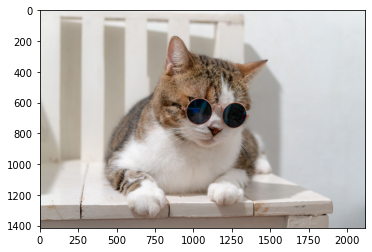

In [10]:
plt.imshow(img);

In [15]:
img[:,:,2] ### acessando um canal da imagem

array([[238, 238, 238, ..., 239, 239, 239],
       [238, 238, 237, ..., 239, 239, 239],
       [237, 237, 237, ..., 239, 239, 239],
       ...,
       [112, 113, 114, ..., 167, 167, 167],
       [111, 113, 114, ..., 167, 166, 166],
       [112, 113, 115, ..., 166, 166, 166]], dtype=uint8)

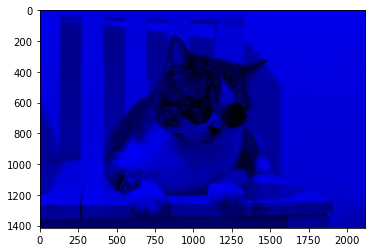

In [17]:
img2 = img.copy()
img2[:,:,1] = 0
img2[:,:,0] = 0
plt.imshow(img2);

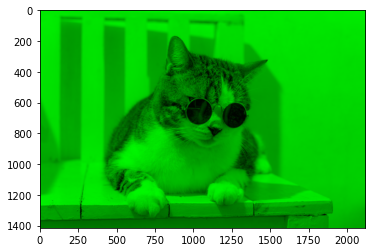

In [19]:
img3 = img.copy()
img3[:,:,2] = 0
img3[:,:,0] = 0
plt.imshow(img3);

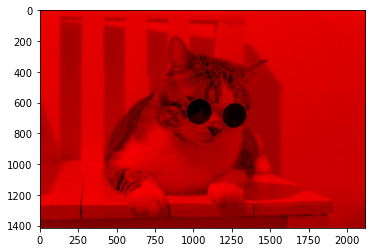

In [20]:
img4 = img.copy()
img4[:,:,2] = 0
img4[:,:,1] = 0
plt.imshow(img4);

### Canais de cores, tensores e volume

* Tensor: altura, largura, canal
* Volume: a quantidade de canais de uma determinada imagem

<img src="https://images.squarespace-cdn.com/content/v1/5c28a79ca9e0286061906e43/1548971303762-CKE6Q5C9P67BBU1U33WZ/conv_rgb.png?format=500w" width=500>


### Redimencionar a imagem

* Nem sempre podemos trabalhar com imagens no seu tamanho original devido ao custo computacional principalmente
* Comumente redimensionamos para tamanhos que tenham um trade off
  * Quanto menor a imagem, menor o campo de visão, menos bits (efeito pixelado)
  * Quanto menor a imagem, mais perda de informação!
  * Quanto maior a imagem, maior o custo computacional
  
* O opencv possui uma função chamada resize para fazer esse dimensionamento (ou operação de escala). Esse dimensionamento pode ser feito de formas distintas:

  * INTER_AREA: INTER_AREA uses pixel area relation for resampling. This is best suited for reducing the size of an image (shrinking). When used for zooming into the image, it uses the    INTER_NEAREST method.
  * INTER_CUBIC: This uses bicubic interpolation for resizing the image. While resizing and interpolating new pixels, this method acts on the 4×4 neighboring pixels of the image. It then takes the weights average of the 16 pixels to create the new interpolated pixel.
  * INTER_LINEAR: This method is somewhat similar to the INTER_CUBIC interpolation. But unlike INTER_CUBIC, this uses 2×2 neighboring pixels to get the weighted average for the interpolated pixel.
  * INTER_NEAREST: The INTER_NEAREST method uses the nearest neighbor concept for interpolation. This is one of the simplest methods, using only one neighboring pixel from the image for interpolation.

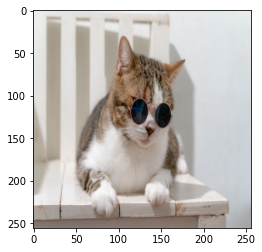

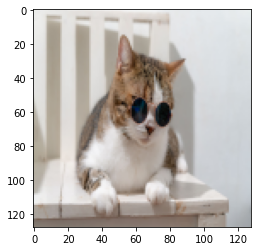

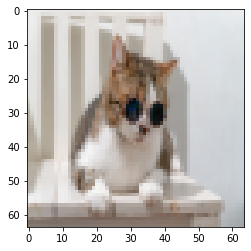

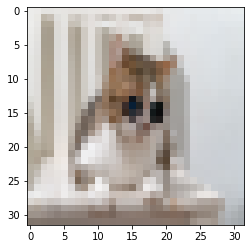

In [27]:
img_256 = cv2.resize(img,(256,256),interpolation=cv2.INTER_AREA)
plt.imshow(img_256);
plt.show()
img_128 = cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA)
plt.imshow(img_128);
plt.show()
img_64 = cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
plt.imshow(img_64)
plt.show()
img_32 = cv2.resize(img,(32,32),interpolation=cv2.INTER_AREA)
plt.imshow(img_32);
plt.show()

#### Brilho e contraste

* Podemos também reduzir o brilho da imagem (tornando-a mais escura) ou aumentar o brilho (tornando-a mais clara), bem como aumentar ou diminuir o contraste da imagem
* O **contraste** controla a **intensidade relativa entre cores claras e escuras**
* Pixels muito semelhantes possuem uma pequena diferença de intensidade entre eles, logo baixo contraste
* Pixels muito distintos possuem uma diferença grande de intensidade, logo alto contraste
* No OpenCV, o brilho é dado por um fator aditivo na imagem, enquanto o contraste é um fator multiplicativo
* Isso pode ser feito pelo opencv por meio da função (addWeighted) https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

* [Equações para contraste](https://www.dfstudios.co.uk/articles/programming/image-programming-algorithms/image-processing-algorithms-part-5-contrast-adjustment/)

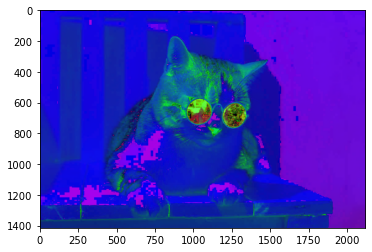

In [62]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) ### hue (matiz, tonalidade) - saturação - valor (brilho)
plt.imshow(hsv);

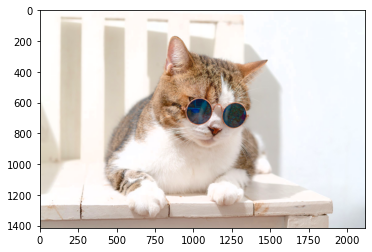

In [63]:
brilho = 42
hsv[:,:,2] = cv2.add(hsv[:,:,2], brilho)
img_bright = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img_bright);

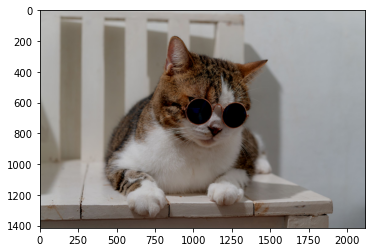

In [90]:
buf_img = img.copy()
buf_img = cv2.addWeighted(buf_img, 1, buf_img, 0, -50)
plt.imshow(buf_img);

#### Operações de recorte
* Podemos manipular nossas imagens assim como fazemos em matrizes do python para selecionar apenas pixels que queremos!
* Slice de matrizes

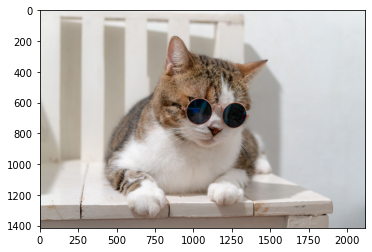

In [91]:
plt.imshow(img);

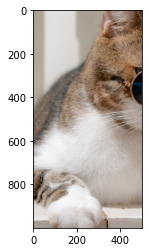

In [92]:
x=500
y=300
w = 500
h = 1000
plt.imshow(img[y:y+h, x:x+w])

#### Rotação e Translação

* Operações matriciais que rotacionam ou deslocam a imagem
* Cada operação possui uma matriz que é multiplicada pela sua imagem original
* O resultado é a imagem rotacionada ou translada

No caso da translação, este tipo de transformação tem como objetivo **deslocar** a imagem. Para isso, utilizamos uma **matriz de transformação afim** do tipo:

$T = \begin{bmatrix}
1 & 0 & t_x\\
0 & 1 & t_y
\end{bmatrix}$

Note que esta matriz é parametrizada por $t_x$ e $t_y$:

- Valores negativos para $t_x$ deslocaram a imagem para esquerda, e valores positivos para a direita; 
- Valores negativos de $t_y$ deslocaram a imagem para cima, e valores positivos para baixo

<img src="https://www.thepythoncode.com/media/articles/image-transformations-using-opencv-in-python/image-translation-explained.png" width=500>

* [Para aprender sobre rotação no Opencv](https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html)
* [Notas de estudo](https://www.thepythoncode.com/article/image-transformations-using-opencv-in-python)

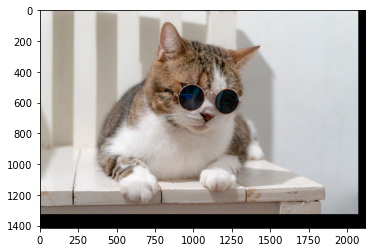

In [95]:
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.imshow(shifted);

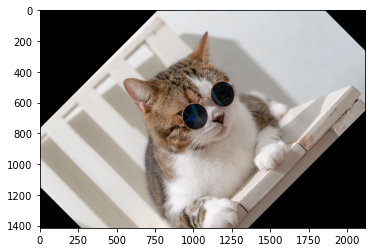

In [94]:
### rotate

height, width = img.shape[:2]
center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image);

### Cisalhamento (shear)

Por fim, podemos utilizar uma matriz afim para aplicar um cisalhamento à imagem.

Para tal utilizamos uma matriz afim semelhante à de translação:

$M = \begin{bmatrix}
1 & cx & 0\\
cy & 1 & 0
\end{bmatrix}$

Os parâmetros $cx$ e $cy$ controlam o cisalhamento.

<img src="https://www.thepythoncode.com/media/articles/image-transformations-using-opencv-in-python/shearing-explained.png" width=500>

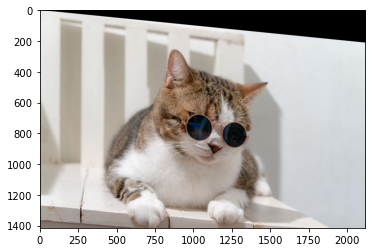

In [113]:
M = np.float32([[1, 0.5, 0],
                [0, 1  , 0],
                [0, 0  , 1]])
M = np.float32([[1,   0, 0],
                [0.1, 1, 0],
                [0,   0, 1]])
rows, cols, dim = img.shape
sheared_img = cv2.warpPerspective(img,M,dsize=(width, height))
plt.imshow(sheared_img);

#### Exercícios

Escolha uma imagem e tente melhorá-la utilizando as operações vistas em sala de aula. Deverão ser realizados os pontos abaixo:
* Recorte da imagem de acordo com uma parte específica da imagem escolhida pelo aluno
* Aplique brilho na imagem utilizando o espaço de cor HSV ou CIE-LAB (lab para o opencv)
* Aplique brilho e contraste usando a função addWeighted do opencv
* Aplique operações de translação e rotação na imagem 
* Aplique operação de shear a partir da imagem original(sem rotação ou translação)

Observação: pode aplicar todas as operações em uma única imagem ou em imagens distintas